# Project: analysis Airbnb data from Barcelona

### Motivation

During the last years, there has been several political movements in the city of Barcelona, which could have affected tourism. On the one hand, catalonian separatism has been really active causing protests and insecurity on the streets (https://www.bbc.com/news/world-europe-50194846). On the other hand, there has been various political campaigns against tourists and visiting the city. They argued that prices were increasing  uncontrollably and city was overcrowded (https://www.theguardian.com/cities/2018/jun/25/tourists-go-home-refugees-welcome-why-barcelona-chose-migrants-over-visitors). Both reasons could caused a reduction in the number of overnight stays and have a negative impact in the economy of the city, increasing poverty.

The aim of this study is to gain some insights with the help of Airbnb data. The following questions are answered in the next lines:

- Which is the current situation of Airbnb hosts in BCN? Which are the characteristics of these accomodations? Are there overcrowded neighbourhhods?
- How has this situation evolved over the last years? Have there been an increase in the  mean overnight stays prices over the last years? And in the amount of rooms and appartments available?
- Who is profiting from the touristic boom in BCN? Companies or individuals?

For this purpose, the summary information and metrics for listings in Barcelona provided by Airbnb is used. This information extract is downloaded for the last 2 years every three months (from 12-17 till 03-20).


### Data Loading and Preprocessing

In [62]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from pathlib import Path

pd.set_option('display.max_columns', 500)

In [63]:
# Import data and append different csv files into one single dataframe.
df = pd.DataFrame()
for filename in Path().glob('listings*.*'):
    df_raw = pd.read_csv(filename)
    df_raw['origin_file'] = filename
    df = df.append(df_raw, sort=True)

In [64]:
# Get some insights in the dataset
df.sample(5)

,availability_365,calculated_host_listings_count,host_id,host_name,id,last_review,latitude,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,origin_file,price,reviews_per_month,room_type
2230,340,187,4459553,Eva&Jacques,3108879,2018-11-28,41.378672,2.147246,2,1758 - AB Plaça Espanya P-3 - Lovely 3-Bedroom...,la Nova Esquerra de l'Eixample,Eixample,17,listings 12-18.csv,600,0.31,Entire home/apt
16952,269,3,7222634,Casa Bonita,39068224,2019-11-30,41.413620,2.170810,30,Single room Sagrada Familia(2),el Baix Guinardó,Horta-Guinardó,1,listings 03-20.csv,18,0.28,Private room
5204,333,4,10287576,Barcelona Nextdoor,13554575,2019-12-01,41.378890,2.161770,3,St. Anthony - Sunny 3 BR apartment,Sant Antoni,Eixample,60,listings 12-19.csv,120,1.44,Entire home/apt
3771,0,2,41561119,Orso,8009809,2019-09-03,41.374530,2.155770,5,cozy and sunny single room,el Poble Sec,Sants-Montjuïc,275,listings 09-19.csv,35,5.57,Private room
7439,228,127,102947901,Claudia,17471263,2019-01-06,41.388070,2.181600,1,"Mozart III, Friendly Rentals","Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,15,listings 03-19.csv,64,0.65,Entire home/apt


In [65]:
# Dtypes, missing values and no. of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191520 entries, 0 to 20842
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   availability_365                191520 non-null  int64  
 1   calculated_host_listings_count  191520 non-null  int64  
 2   host_id                         191520 non-null  int64  
 3   host_name                       190503 non-null  object 
 4   id                              191520 non-null  int64  
 5   last_review                     150812 non-null  object 
 6   latitude                        191520 non-null  float64
 7   longitude                       191520 non-null  float64
 8   minimum_nights                  191520 non-null  int64  
 9   name                            191306 non-null  object 
 10  neighbourhood                   191520 non-null  object 
 11  neighbourhood_group             191520 non-null  object 
 12  number_of_reviews

The dataset has 191520 entries and almost every column is completed. The amount of missing data is really low. Let's have a look at the columns with missing values...

In [66]:
# Percentage of missing values per column
df.isna().mean().sort_values(ascending = False)

reviews_per_month                 0.212646
last_review                       0.212552
host_name                         0.005310
name                              0.001117
room_type                         0.000000
latitude                          0.000000
calculated_host_listings_count    0.000000
host_id                           0.000000
id                                0.000000
minimum_nights                    0.000000
longitude                         0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
number_of_reviews                 0.000000
origin_file                       0.000000
price                             0.000000
availability_365                  0.000000
dtype: float64

In [67]:
# Percentage of entries with 0 reviews
df[df.number_of_reviews == 0]['number_of_reviews'].count()/df.shape[0]

0.21194653299916458

In [68]:
# Host names
df.host_name.value_counts()

Maria             1801
Jordi             1756
Claudia           1654
David             1381
Anna              1375
                  ... 
Stacia               1
Federico Ariel       1
Obadiah              1
MariPat              1
Guibet               1
Name: host_name, Length: 8585, dtype: int64

In [69]:
# Names
df[df.name.isna() == True]

,availability_365,calculated_host_listings_count,host_id,host_name,id,last_review,latitude,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,origin_file,price,reviews_per_month,room_type
3057,0,1,17713529,Anna,3518018,NaN,41.381216,2.161014,1,NaN,Sant Antoni,Eixample,0,listings 02-18.csv,60,NaN,Private room
3899,0,2,26052422,Neda,5046602,2015-03-04,41.361114,2.136168,1,NaN,la Marina de Port,Sants-Montjuïc,1,listings 02-18.csv,65,0.03,Private room
4138,0,1,28266987,Vincanyol,5449446,NaN,41.401811,2.161816,1,NaN,la Vila de Gràcia,Gràcia,0,listings 02-18.csv,250,NaN,Entire home/apt
4715,0,1,19224227,Rafa,6580138,2016-05-08,41.385244,2.160222,2,NaN,l'Antiga Esquerra de l'Eixample,Eixample,2,listings 02-18.csv,85,0.06,Private room
4733,0,2,10392401,Elena,6606434,2016-10-30,41.400125,2.197157,2,NaN,el Poblenou,Sant Martí,13,listings 02-18.csv,40,0.40,Private room
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,0,1,2280524,Sarai,10915862,NaN,41.404010,2.154390,1,NaN,la Vila de Gràcia,Gràcia,0,listings 12-19.csv,180,NaN,Private room
4434,0,1,41813973,Mar,11012484,NaN,41.403490,2.157590,1,NaN,la Vila de Gràcia,Gràcia,0,listings 12-19.csv,40,NaN,Private room
5273,0,1,79467759,Vicens,13683831,NaN,41.378460,2.137590,3,NaN,Sants,Sants-Montjuïc,0,listings 12-19.csv,50,NaN,Private room
5303,0,1,80531081,NaN,13748714,2016-07-11,41.396900,2.203010,1,NaN,el Poblenou,Sant Martí,2,listings 12-19.csv,25,0.05,Private room


Column reviews_per_month and last_review are those with the greater amount of missing values. Since datasets are created programmatically, it can be assumed that these missing values are caused by the lack of customer feedback. This is also confirmed when we analyze the amount of entries with 0 reviews. Consequently, these columns are maintained and the following strategies are followed:
- For reviews_per_month, a value of 0 is realistic according to the previous assumption. 
- The last_review column is left as it was, since no date can be inferred. However, since the information provided can be useful, neither the column nor the rows are dropped.

Regarding the host_name column, it does not provide any relevant information for the analysis. Thus, the column is dropped.

Finally, the name column has approximatelly 0.1% of missing values. This column contains the name of the accomodations. This information could be useful in a future step of this work. As customers are not booking an accomodation without a name or description and the amount of rows is really small compared to the size of the dataset, these entries are completely dropped from it.

In [70]:
# Cleaning tasks
# Drop column host_name
df.drop('host_name', axis = 1, inplace = True)

# Drop rows with missing names
df.dropna(subset = ['name'], axis = 0, inplace = True)

# Impute value for reviews_per_month
df.reviews_per_month.fillna(0, inplace = True, axis = 0)

In [71]:
# Let's see if the cleaning has worked properly
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191306 entries, 0 to 20842
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   availability_365                191306 non-null  int64  
 1   calculated_host_listings_count  191306 non-null  int64  
 2   host_id                         191306 non-null  int64  
 3   id                              191306 non-null  int64  
 4   last_review                     150710 non-null  object 
 5   latitude                        191306 non-null  float64
 6   longitude                       191306 non-null  float64
 7   minimum_nights                  191306 non-null  int64  
 8   name                            191306 non-null  object 
 9   neighbourhood                   191306 non-null  object 
 10  neighbourhood_group             191306 non-null  object 
 11  number_of_reviews               191306 non-null  int64  
 12  origin_file      

As expected just the column last_review has now missing values.

From the previous table, it can be seen that some data types need to be changed. 
- last_review contains dates. Thus, it would be helpful to parse these dates.
- origin_file was a column introduced while creating the dataset. It tell us when the information was collected. Consequently, it would be interesting to extract the date from the string and parse it.

In [72]:
# last_review to datetime
df.last_review = pd.to_datetime(df.last_review, infer_datetime_format=True)  

# extract info from origin_file column
df["origin_file"] = df["origin_file"].astype(str).str.slice(start = 9, stop = 14)
#df["origin_file"] = "01-" + df["origin_file"].astype(str)
df["origin_file"] = pd.to_datetime(df["origin_file"],format = '%m-%y') #%d-dayfirst = True, 

In [73]:
# Let's see final dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191306 entries, 0 to 20842
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   availability_365                191306 non-null  int64         
 1   calculated_host_listings_count  191306 non-null  int64         
 2   host_id                         191306 non-null  int64         
 3   id                              191306 non-null  int64         
 4   last_review                     150710 non-null  datetime64[ns]
 5   latitude                        191306 non-null  float64       
 6   longitude                       191306 non-null  float64       
 7   minimum_nights                  191306 non-null  int64         
 8   name                            191306 non-null  object        
 9   neighbourhood                   191306 non-null  object        
 10  neighbourhood_group             191306 non-null  object  

In [74]:
# Now the dataset is ready. Let's have a final look to the dataset
df.sample(10)

,availability_365,calculated_host_listings_count,host_id,id,last_review,latitude,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,origin_file,price,reviews_per_month,room_type
4931,349,50,6099660,9774000,2018-08-12,41.375732,2.124558,1,CAMP NOU MUNNE 1-1 APARTMENT,Sants - Badal,Sants-Montjuïc,17,2018-12-01,60,0.58,Entire home/apt
6126,27,1,100209435,15561742,2019-09-08,41.393230,2.149030,3,Big double room Eixample,l'Antiga Esquerra de l'Eixample,Eixample,73,2019-09-01,51,2.47,Private room
10937,155,3,138938457,19859737,2018-08-16,41.379154,2.179576,2,Rooms Barcelona,el Barri Gòtic,Ciutat Vella,9,2018-09-01,80,0.67,Private room
9901,109,1,28831112,18472851,2018-05-15,41.384742,2.179236,1,Habitación doble en el Born,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,40,2018-06-01,40,3.06,Private room
3417,130,1,144839774,20569507,2017-08-31,41.401823,2.168672,2,"Large & light, 2 blocks from Sagrada Familia",la Dreta de l'Eixample,Eixample,1,2017-12-01,43,0.30,Private room
11944,294,1,211821411,28042321,2019-11-24,41.400760,2.195460,2,Loft Independiente 150Mq Barcelona min 2 person,el Parc i la Llacuna del Poblenou,Sant Martí,64,2019-12-01,47,4.19,Entire home/apt
14193,9,2,15512663,31709736,2019-08-23,41.383580,2.181770,2,Born & cozy,"Sant Pere, Santa Caterina i la Ribera",Ciutat Vella,11,2019-09-01,30,1.39,Private room
6820,262,1,121880456,17825682,2019-11-25,41.410310,2.207390,2,BigBedroom&ModernNewFlat! 5mBeach! 10mCenter,Provençals del Poblenou,Sant Martí,162,2019-12-01,55,4.94,Private room
16323,9,3,11078628,21549323,NaT,41.412195,2.217970,4,Trendy Beach Apartment,el Besòs i el Maresme,Sant Martí,0,2018-02-01,400,0.00,Entire home/apt
7442,343,12,1093718,19724815,2019-12-22,41.419240,2.211590,32,B4 - Townhouse with Terrace near CCIB and Beach,el Besòs i el Maresme,Sant Martí,2,2020-03-01,70,0.09,Entire home/apt


### Question 1: Which is the current situation of Airbnb hosts in BCN? Which are the characteristics of these accomodations? Are there overcrowded neighbourhhods?

For this purpose, a copy of the dataframe is done and we filter to the current data (origin_file = 2020-01-03). 

In [75]:
# Copy of dataset
df_q1 = df.copy()
df_q1 = df_q1[df_q1.origin_file == '2020-03-01']

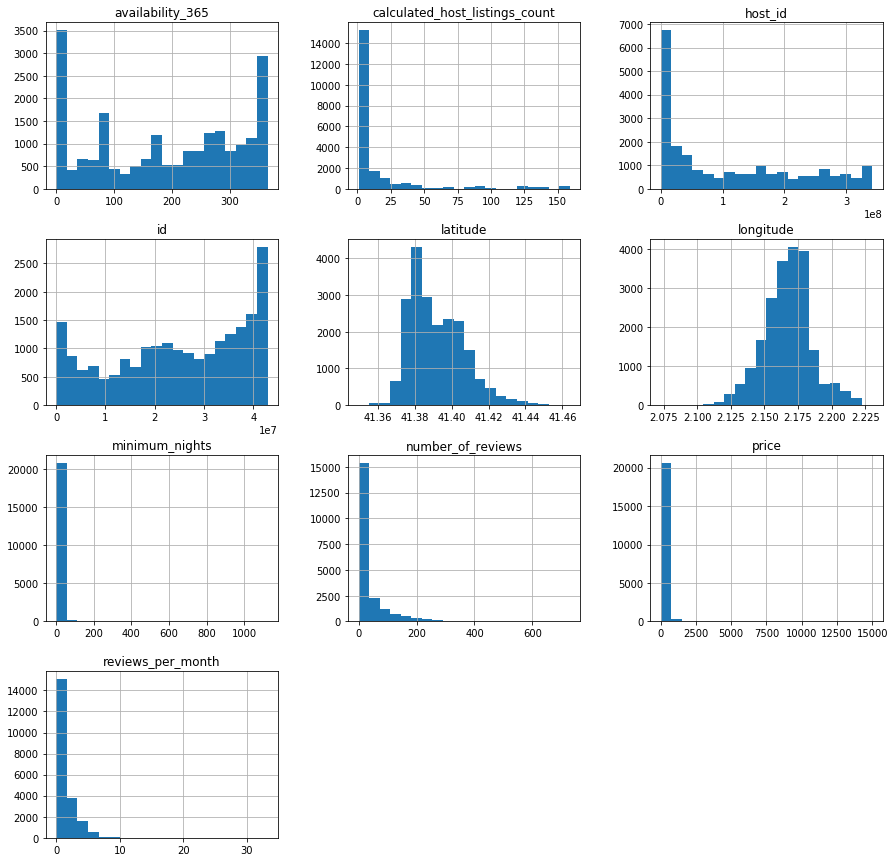

In [76]:
# Get some insights in the individual numerical features
df_q1.hist(figsize = (15, 15), bins = 20);

In [77]:
df_q1.describe()

,availability_365,calculated_host_listings_count,host_id,id,latitude,longitude,minimum_nights,number_of_reviews,price,reviews_per_month
count,21101.000000,21101.000000,2.110100e+04,2.110100e+04,21101.000000,21101.000000,21101.000000,21101.000000,21101.000000,21101.000000
mean,188.847543,14.891996,1.097458e+08,2.494396e+07,41.391938,2.167572,9.213497,35.952182,131.735463,1.223727
std,127.692045,31.127951,1.102288e+08,1.341257e+07,0.014896,0.017935,20.337863,65.152543,424.591743,1.587324
min,0.000000,1.000000,3.073000e+03,2.319700e+04,41.349670,2.072940,1.000000,0.000000,0.000000,0.000000
25%,73.000000,1.000000,9.478280e+06,1.427566e+07,41.380300,2.157020,1.000000,1.000000,36.000000,0.020000
50%,201.000000,2.000000,6.263330e+07,2.638724e+07,41.388830,2.168360,2.000000,7.000000,60.000000,0.570000
75%,305.000000,11.000000,1.938202e+08,3.724265e+07,41.401950,2.178030,4.000000,42.000000,102.000000,1.960000
max,365.000000,159.000000,3.416877e+08,4.291406e+07,41.464010,2.230120,1124.000000,729.000000,15000.000000,33.260000


From the previous cells, the following conclusions can be extracted:

- Distributions for id and host id are numerical variables but with a categorical meaning. Thus, their histograms are not useful for any analysis.
- The availability column has a U-shape distribution, with a huge concentration of appartments with really low availabilities at one end and with high availabilities at the other end. it can be seen the distribution of the different variables.
- Longitude and latitude distributions show a higher concentration of accomodations at certain coordinates. Are these the most popular neighbourhoods? At the same time, longitude has a bell-shaped distribution, while latitude is slightly right skewed.
- Histograms for the minimum number of nights, number of reviews, price and reviews per month are corrupt due to the presence of some outliers. Let's have a look at them. 

In [78]:
# Minimum number of nights
df_q1[df_q1.minimum_nights > 180].minimum_nights.value_counts()

300     5
365     4
210     3
187     1
250     1
900     1
181     1
500     1
270     1
265     1
360     1
1124    1
200     1
192     1
Name: minimum_nights, dtype: int64

In [79]:
df_q1[df_q1.minimum_nights > 180].last_review.value_counts(dropna = False)

NaT           12
2019-09-02     1
2018-12-30     1
2018-12-20     1
2019-04-17     1
2019-07-31     1
2018-11-20     1
2019-05-14     1
2019-10-07     1
2019-10-10     1
2020-02-02     1
2018-12-21     1
Name: last_review, dtype: int64

Airbnb is thought as a vacational accomodation booking service and thus, most of the appartments have no restrictions or really low restrictions regarding minimum number of nights. Those with a minimum nights restriction greater than 180 days (3 months), are considered as outliers and dropped. 3 months have been considered to set this threshold since they can correspond to the 3 summer months and people booking a house for the whole season. At the same time, most of these accomodations have no reviews.

In [80]:
# Dropping long-term accomodations
df_q1 = df_q1[df_q1.minimum_nights < 180]

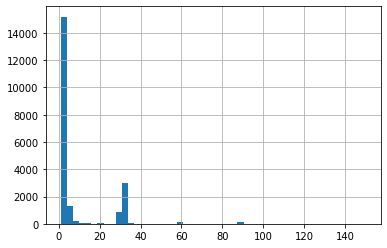

In [81]:
# Resulting histogram
df_q1.minimum_nights.hist(bins = 50);

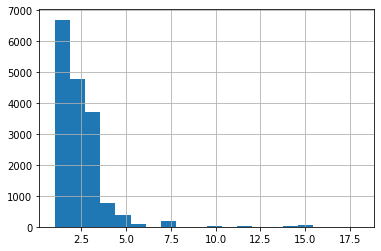

In [82]:
df_q1[df_q1.minimum_nights < 20].minimum_nights.hist(bins = 20);

From the previous histogram, it can be depicted that most of the accomodations have a really small restriction regarding minimum number of nights. This facilitates a great rotation, which could be annoying for the neighbours at some point.

In [83]:
# Prices
df_q1.price.value_counts(bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 15000])/df_q1.shape[0]

(-0.001, 50.0]      0.430268
(50.0, 100.0]       0.318070
(100.0, 150.0]      0.108731
(150.0, 200.0]      0.052442
(200.0, 250.0]      0.021946
(950.0, 15000.0]    0.019333
(250.0, 300.0]      0.014725
(450.0, 500.0]      0.008123
(300.0, 350.0]      0.007030
(350.0, 400.0]      0.006175
(550.0, 600.0]      0.002993
(400.0, 450.0]      0.002613
(750.0, 800.0]      0.001758
(850.0, 900.0]      0.001758
(650.0, 700.0]      0.001473
(500.0, 550.0]      0.001093
(600.0, 650.0]      0.000523
(700.0, 750.0]      0.000380
(800.0, 850.0]      0.000333
(900.0, 950.0]      0.000238
Name: price, dtype: float64

In [84]:
df_q1.price.value_counts(bins = [0, 250, 500, 1000, 15000])/df_q1.shape[0]

(-0.001, 250.0]      0.931455
(250.0, 500.0]       0.038666
(500.0, 1000.0]      0.022421
(1000.0, 15000.0]    0.007458
Name: price, dtype: float64

Most of the accomodations have a price lower than 250€ per night (93.15%). However, there are some outliers with prices higher than 500€ (2.48%). These high prices can be explained in two different ways:
- Really big accomodations which include a high number of guests.
- Luxury appartments.

Since both of them do not represent the reality of BCN, these are dropped as they could bias the analysis.

In [85]:
# Filter outliers
df_q1 = df_q1[df_q1.price < 500]

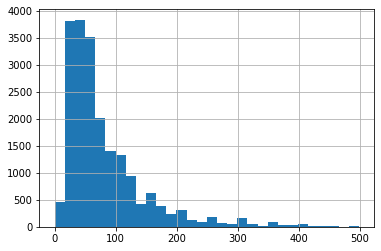

In [86]:
# Resulting histogram
df_q1.price.hist(bins = 30);

From the histogram, it can be observed a right-skewed distribution of the prices, with most of the accommodations with a price lower than 100€ per night.

Information regarding amount of reviews is not used in the next steps. Consequently, no further analysis of this feature is done.

Now that we have understood the data better, let's try to answer the first question: Which is the current situation of Airbnb hosts in BCN? Which are the characteristics of these accomodations? Are there overcrowded neighbourhhods?

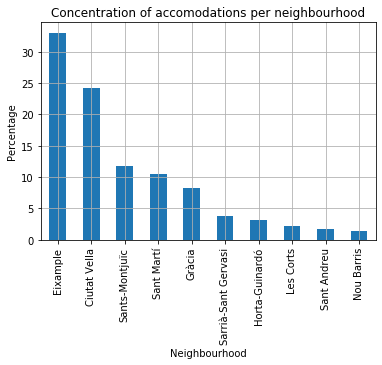

In [87]:
# Distribution of the accomodations per neighbourhood
ax = (df_q1.groupby('neighbourhood_group')['id'].count()/df_q1.shape[0]*100).sort_values(ascending = False).plot.bar(grid = True);
ax.set_title('Concentration of accomodations per neighbourhood')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Percentage');

In [88]:
# Sort index for later charts
order = list((df_q1.groupby('neighbourhood_group')['id'].count()/df_q1.shape[0]).sort_values(ascending = False).index)
order

['Eixample',
 'Ciutat Vella',
 'Sants-Montjuïc',
 'Sant Martí',
 'Gràcia',
 'Sarrià-Sant Gervasi',
 'Horta-Guinardó',
 'Les Corts',
 'Sant Andreu',
 'Nou Barris']

From the previous chart, it can be seen how most of the accomodations concentrate in a few of the neighbourhoods.

In [89]:
# Type of accomodations per neighbourhood
roomtypes_per_neigh = (df_q1.groupby(['neighbourhood_group', 'room_type'])['id'].count()).to_frame()
roomtypes_per_neigh = roomtypes_per_neigh.reset_index()
neighbourhoods = (df_q1.groupby('neighbourhood_group')['id'].count()).to_frame()
roomtypes_per_neigh = roomtypes_per_neigh.merge(neighbourhoods, how ='left', on ='neighbourhood_group')
roomtypes_per_neigh['percentage'] = roomtypes_per_neigh['id_x']/roomtypes_per_neigh['id_y']*100
roomtypes_per_neigh = roomtypes_per_neigh.set_index(['neighbourhood_group', 'room_type'])
roomtypes_per_neigh

id_x  id_y  percentage
neighbourhood_group room_type                              
Ciutat Vella        Entire home/apt  2129  4901   43.440114
                    Hotel room         28  4901    0.571312
                    Private room     2711  4901   55.315242
                    Shared room        33  4901    0.673332
Eixample            Entire home/apt  3307  6696   49.387694
                    Hotel room        194  6696    2.897252
                    Private room     3142  6696   46.923536
                    Shared room        53  6696    0.791517
Gràcia              Entire home/apt   800  1680   47.619048
                    Hotel room         36  1680    2.142857
                    Private room      826  1680   49.166667
                    Shared room        18  1680    1.071429
Horta-Guinardó      Entire home/apt   189   647   29.211747
                    Private room      454   647   70.170015
                    Shared room         4   647    0.618238
Les Corts           Entire home/apt   155   439   35.307517
                    Hotel room         14   439    3.189066
                    Private room      257   439   58.542141
                    Shared room        13   439    2.961276
Nou Barris          Entire home/apt    43   280   15.357143
                    Hotel room          2   280    0.714286
                    Private room      230   280   82.142857
                    Shared room         5   280    1.785714
Sant Andreu         Entire home/apt    89   345   25.797101
                    Private room      251   345   72.753623
                    Shared room         5   345    1.449275
Sant Martí          Entire home/apt   894  2119   42.189712
                    Hotel room         13  2119    0.613497
                    Private room     1184  2119   55.875413
                    Shared room        28  2119    1.321378
Sants-Montjuïc      Entire home/apt  1038  2389   43.449142
                    Hotel room         35  2389    1.465048
                    Private room     1277  2389   53.453328
                    Shared room        39  2389    1.632482
Sarrià-Sant Gervasi Entire home/apt   411   781   52.624840
                    Hotel room          4   781    0.512164
                    Private room      363   781   46.478873
                    Shared room         3   781    0.384123

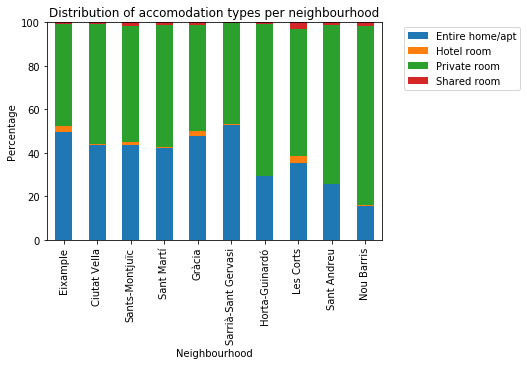

In [90]:
ax = roomtypes_per_neigh['percentage'].unstack().reindex(order).plot(kind='bar', stacked=True);
ax.set_title('Distribution of accomodation types per neighbourhood')
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Percentage')
ax.set_ylim(0,100)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

From the previous chart, it can be observed that the number of hotel and shared rooms in Airbnb is negligible compared to other types of accomodations. In the neighbourhoods with more accomodations (Eixample, Ciutat Vella, Sants-Montjuic, Sant-Marti), there is approximatelly the same amount of entire homes and private rooms. On the other hand, in the less populated neighbourhoods in terms of accomodations available, there are more private rooms than entire appartments.

Finally, let's evaluate the price distributions on every neighbourhood.

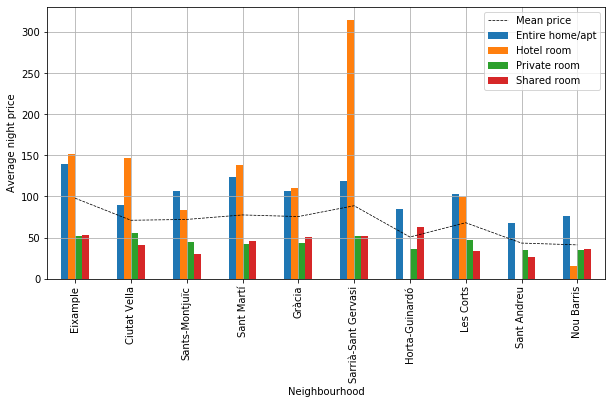

In [91]:
# Prices
df_q1.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack().reindex(order).plot.bar(figsize=(10,5), grid = True);
df_q1.groupby(['neighbourhood_group'])['price'].mean().reindex(order).rename('Mean price').plot(color = 'k', style = '--', linewidth=0.75, grid = True);
plt.legend()
plt.xticks(rotation = 90)
plt.xlabel('Neighbourhood')
plt.ylabel('Average night price');


It can be observed how the most popular neighbourhoods in terms of number of available accomodations have also the higher average prices. Hotel rooms tend to be more expensive than entire appartments, while private and shared rooms are cheapers than any other type of accomodation. Surprisingly, shared rooms tend to have higher prices than private rooms. It is also remarkable that in Sarria-Sant Gervasi  there is an outlier, which elevates extremely the average hotel room average price. Let's have a closer look to hotels in Sarria-Sant Gervasi.

In [92]:
df_q1[(df_q1.neighbourhood_group == "Sarrià-Sant Gervasi") & (df_q1.room_type == "Hotel room")]

,availability_365,calculated_host_listings_count,host_id,id,last_review,latitude,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,origin_file,price,reviews_per_month,room_type
10742,335,40,5264883,26813253,2020-01-08,41.40559,2.14638,32,Modern penthouse private terrace,el Putxet i el Farró,Sarrià-Sant Gervasi,4,2020-03-01,60,0.25,Hotel room
11376,225,4,48645551,28423955,2019-12-16,41.39495,2.14328,1,Homely Apartment,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,6,2020-03-01,400,0.42,Hotel room
11378,284,4,48645551,28424511,2019-10-14,41.39526,2.14328,1,Cozy Apartment,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,8,2020-03-01,400,0.49,Hotel room
11409,262,4,48645551,28532384,2019-08-21,41.39538,2.14469,1,Executive Apartment,Sant Gervasi - Galvany,Sarrià-Sant Gervasi,4,2020-03-01,400,0.25,Hotel room


In this neighbourhood, there are just 4 hotel rooms with a really high price per night compared to the rest of the city. Finally, let's evaluate the availability of every accomodation per neighbourhood.

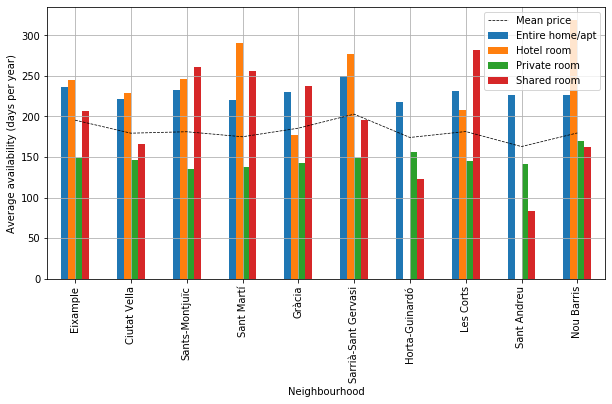

In [93]:
df_q1.groupby(['neighbourhood_group', 'room_type'])['availability_365'].mean().unstack().reindex(order).plot.bar(figsize=(10,5), grid = True)
df_q1.groupby(['neighbourhood_group'])['availability_365'].mean().reindex(order).rename('Mean price').plot(color = 'k', style = '--', linewidth=0.75, grid = True);
plt.legend()
plt.xticks(rotation = 90)
plt.xlabel('Neighbourhood')
plt.ylabel('Average availability (days per year)');

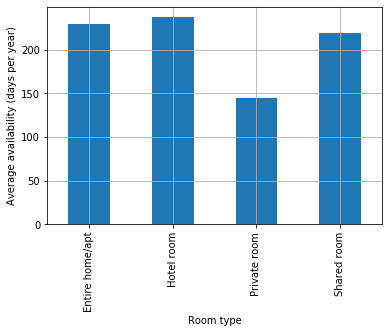

In [94]:
df_q1.groupby(['room_type'])['availability_365'].mean().plot.bar(grid = True)
plt.xticks(rotation = 90)
plt.xlabel('Room type')
plt.ylabel('Average availability (days per year)');

When talking about availability, the neighboorhood has no influence, as no trend can be observed on average. However, depending on the room type, different behaviours can be depicted. Private rooms tend to have less availability than entire appartments and hotel rooms, being this last group the one with the highest availability.

In [95]:
df_q1[df_q1.neighbourhood_group == 'Eixample'].groupby('neighbourhood')['neighbourhood'].count()

neighbourhood
Sant Antoni                        1001
el Fort Pienc                       556
l'Antiga Esquerra de l'Eixample    1071
la Dreta de l'Eixample             2070
la Nova Esquerra de l'Eixample      908
la Sagrada Família                 1090
Name: neighbourhood, dtype: int64

### Question 2: How has this situation evolved over the last years? Have there been an increase in the  mean overnight stays prices over the last years? And in the amount of rooms and appartments available?

For this purpose, the whole dataset is used. Similar graphs as those which were used to answer the previous questions are drawn. In the first steps, the same cleaning tasks are performed, since the same assumptions can be used.

In [96]:
# Copy of dataset
df_q2 = df.copy()

In [97]:
# Dropping long-term accomodations
df_q2 = df_q2[df_q2.minimum_nights < 180]

In [98]:
# Filter price outliers
df_q1 = df_q1[df_q1.price < 500]

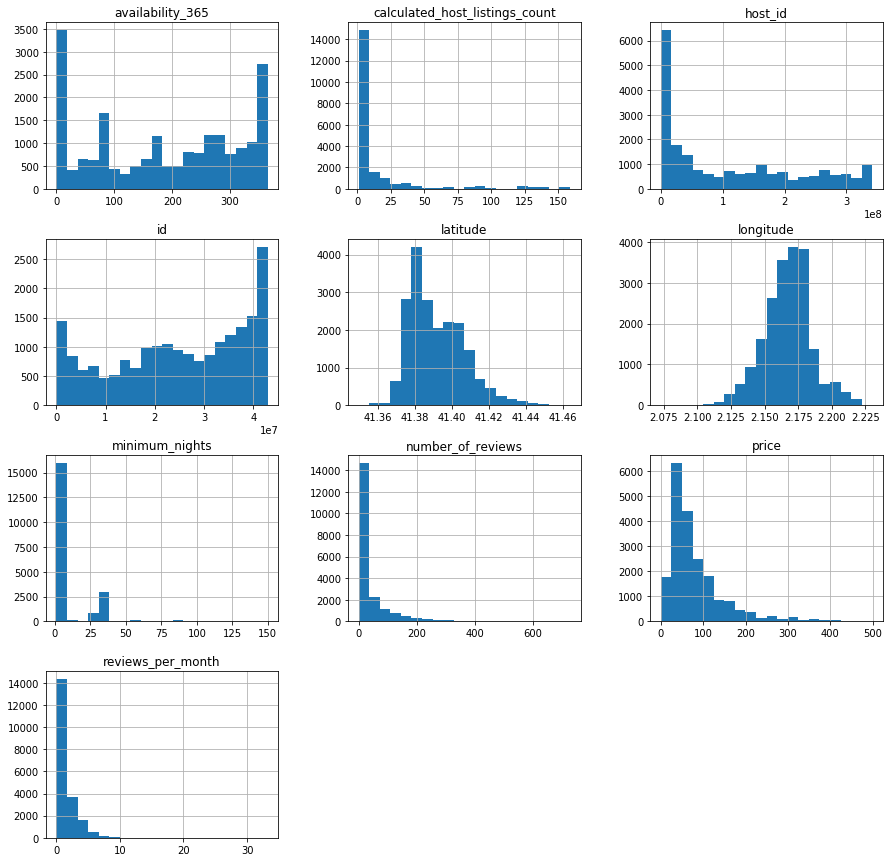

In [99]:
# Visualize histograms
df_q1.hist(figsize = (15, 15), bins = 20);

No great differences in the data distribution are observed compared to the current data. Consequently, we can start with the analysis now. For visualization purposes, let's focused first in the four neighbourhoods with more accomodations nowadays.

Text(0.5, 1.0, 'Evolution of the amount of accomodations over time')

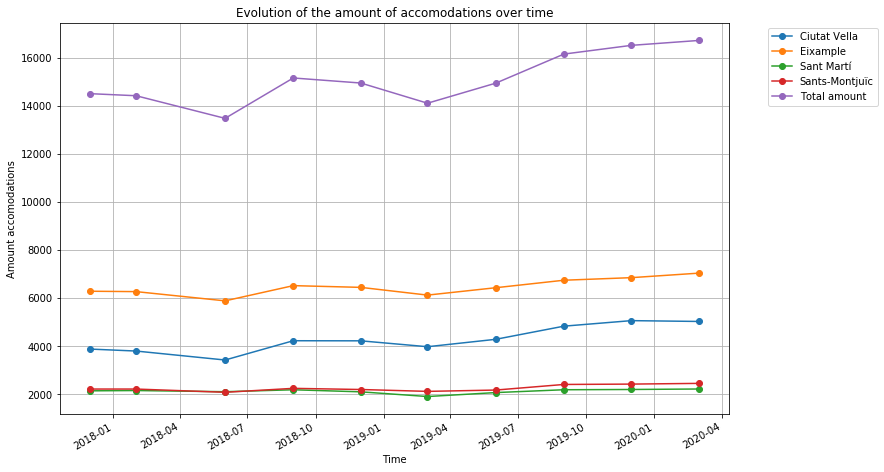

In [120]:
# Evolution amount of accomodations over time
most_accom = order[0:4]
df_q2_most = df_q2[df_q2.neighbourhood_group.isin(most_accom)]
df_vis = df_q2_most.groupby(['origin_file', 'neighbourhood_group'])['id'].count().unstack()
df_vis_2 = df_vis.copy()
df_vis_2['Total amount'] = df_vis.sum(axis=1)

#fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (12,8))
#fig.subplots_adjust(hspace =0.5)
#df_vis.plot(kind ='bar', grid = True, ax=ax[0]);
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
df_vis_2.plot(kind = 'line', grid = True, marker = 'o', figsize = (12,8));
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.xlabel('Time')
plt.ylabel('Amount accomodations');
plt.title('Evolution of the amount of accomodations over time')

It can be seen that every neighbourhood has a similar behaviour, with a positive trend regarding the amount of available appartments. Talking in percentage:

In [121]:
# Percentage increase
(((df_vis_2.pct_change(periods = 9).dropna().reset_index(drop=True)).T)*100).rename(columns={0: "Percentual change"})

,Percentual change
neighbourhood_group,
Ciutat Vella,29.666925
Eixample,11.992355
Sant Martí,3.558052
Sants-Montjuïc,10.678733
Total amount,15.271072


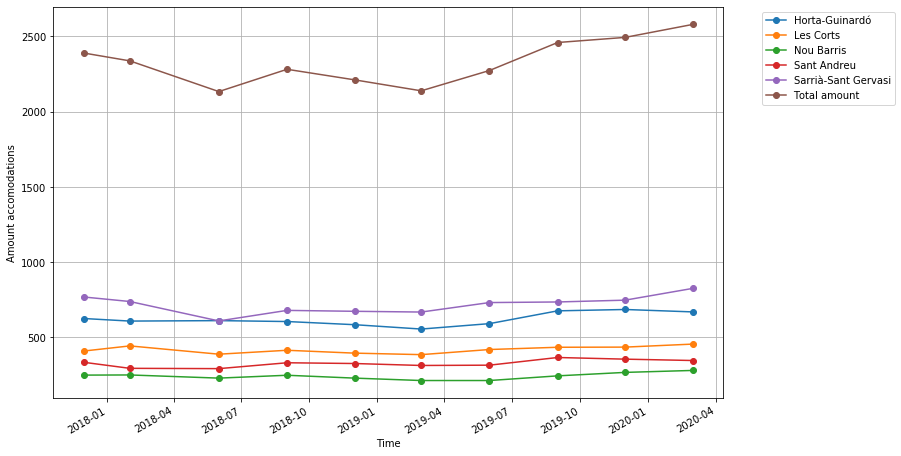

In [102]:
# Evolution amount of accomodations over time
most_accom = order[5:11]
df_q2_most = df_q2[df_q2.neighbourhood_group.isin(most_accom)]
df_vis = df_q2_most.groupby(['origin_file', 'neighbourhood_group'])['id'].count().unstack()
df_vis_2 = df_vis.copy()
df_vis_2['Total amount'] = df_vis.sum(axis=1)

#fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (12,8))
#fig.subplots_adjust(hspace =0.5)
#df_vis.plot(kind ='bar', grid = True, ax=ax[0]);
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
df_vis_2.plot(kind = 'line', grid = True, marker = 'o', figsize = (12,8));
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.xlabel('Time')
plt.ylabel('Amount accomodations');

In [103]:
# Percentage increase
(((df_vis_2.pct_change(periods = 9).dropna().reset_index(drop=True)).T)*100).rename(columns={0: "Percentual change"})

,Percentual change
neighbourhood_group,
Horta-Guinardó,7.028754
Les Corts,11.219512
Nou Barris,12.400000
Sant Andreu,3.582090
Sarrià-Sant Gervasi,7.412224
Total amount,7.949791


From the previous analysis, it can be concluded that there has been an increase in the amount of available accomodations in the city of BCN over the last few years. This increase is greater on average in the neighbourhoods with a higher concentration of appartments than in the less popular neighbourhoods. At the same time, Les Corts and Nou Barris has seen an increase in the overnight places offered comparable to the one observed in Eixample and Saints-Montjuic. At the same time, in Ciutat Vella there has been an increase in the offer greater than 30% in just 2 years. 

In [122]:
# Type of accomodations per neighbourhood
roomtypes_per_time = (df_q2.groupby(['origin_file', 'room_type'])['id'].count()).to_frame()
roomtypes_per_time = roomtypes_per_time.reset_index()
time = (df_q2.groupby(['origin_file'])['id'].count()).to_frame()
roomtypes_per_time = roomtypes_per_time.merge(time, how ='left', on ='origin_file')
roomtypes_per_time['percentage'] = roomtypes_per_time['id_x']/roomtypes_per_time['id_y']
roomtypes_per_time = roomtypes_per_time.set_index(['origin_file', 'room_type'])
roomtypes_per_time

id_x   id_y  percentage
origin_file room_type                                
2017-12-01  Entire home/apt   8721  18641    0.467840
            Private room      9754  18641    0.523255
            Shared room        166  18641    0.008905
2018-02-01  Entire home/apt   8609  18488    0.465653
            Private room      9701  18488    0.524719
            Shared room        178  18488    0.009628
2018-06-01  Entire home/apt   6916  17191    0.402304
            Private room     10108  17191    0.587982
            Shared room        167  17191    0.009714
2018-09-01  Entire home/apt   8543  19127    0.446646
            Private room     10416  19127    0.544571
            Shared room        168  19127    0.008783
2018-12-01  Entire home/apt   8736  18804    0.464582
            Private room      9890  18804    0.525952
            Shared room        178  18804    0.009466
2019-03-01  Entire home/apt   8731  17747    0.491970
            Private room      8823  17747    0.497154
            Shared room        193  17747    0.010875
2019-06-01  Entire home/apt   9141  18792    0.486430
            Private room      9444  18792    0.502554
            Shared room        207  18792    0.011015
2019-09-01  Entire home/apt   9031  20345    0.443893
            Hotel room         776  20345    0.038142
            Private room     10381  20345    0.510248
            Shared room        157  20345    0.007717
2019-12-01  Entire home/apt   9503  20783    0.457249
            Hotel room         524  20783    0.025213
            Private room     10576  20783    0.508877
            Shared room        180  20783    0.008661
2020-03-01  Entire home/apt   9590  21052    0.455539
            Hotel room         419  21052    0.019903
            Private room     10812  21052    0.513585
            Shared room        231  21052    0.010973

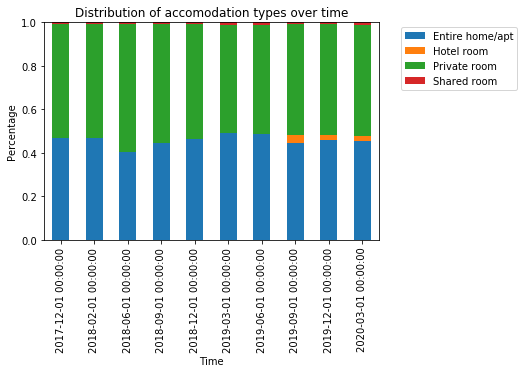

In [123]:
ax = roomtypes_per_time['percentage'].unstack().plot(kind='bar', stacked=True);
ax.set_title('Distribution of accomodation types over time')
ax.set_xlabel('Time')
ax.set_ylabel('Percentage')
ax.set_ylim(0,1)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

When talking about the different accomodation types, no clear trend is observed over the last 2 years. The distribution of the same remains more or less equal in spite of the general increase in the amount of accomodation observed previously. Additionally, it looks that hotel rooms have been included from September 2019 and previously, this type of accomodation were not included in the stats. Let's see the prices evolution over the different neighbourhoods.

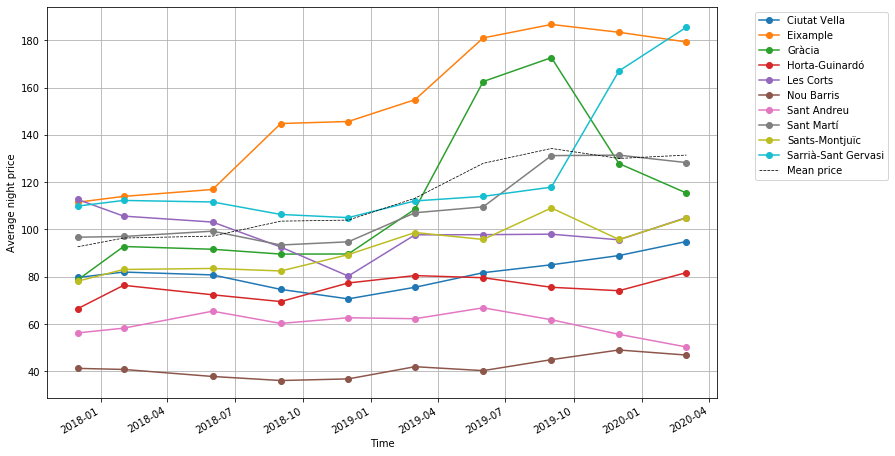

In [106]:
# Prices
df_q2.groupby(['origin_file', 'neighbourhood_group'])['price'].mean().unstack().plot.line(figsize=(10,5), grid = True, marker = "o");
df_q2.groupby(['origin_file'])['price'].mean().rename('Mean price').plot.line(color = 'k', style = '--', linewidth=0.75, grid = True, figsize = (12,8));
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
#plt.xticks(rotation = 90)
plt.xlabel('Time')
plt.ylabel('Average night price');

A general increase in prices over the last 2 years is observed. Specially remarkable in the situation in neighbourhoods like Eixample and Sarria-Sant Gervasi with an increase clearly over the average. Let's see the percentual changes.

In [107]:
# Percentaul changes
df_q2_per = df_q2.groupby(['origin_file', 'neighbourhood_group'])['price'].mean().unstack()
df_q2_mean = df_q2.groupby(['origin_file'])['price'].mean().rename('Mean price')
df_q2_per = df_q2_per.merge(df_q2_mean, on='origin_file', how = 'inner')
(((df_q2_per.pct_change(periods = 9).dropna().reset_index(drop=True)).T)*100).rename(columns={0: "Percentual change"})

,Percentual change
Ciutat Vella,19.104790
Eixample,60.819852
Gràcia,46.746024
Horta-Guinardó,22.960513
Les Corts,-6.809161
Nou Barris,13.676980
Sant Andreu,-10.581745
Sant Martí,32.645072
Sants-Montjuïc,34.172751
Sarrià-Sant Gervasi,68.877470


Looking at the percentual changes, a general increase in prices is observed. On average prices have increased 41.86%. Just a few neighbourhoods have observed a reduction in the prices (Sant Andreu and Les Corts). Eixample is the neighbourhood with the most number of accomodations and at the same time, the higher increase in prices, influencing the average increase.

### Question 3: Who is profiting from the touristic boom in BCN? Companies or individuals?

One way of analyzing this fact can be to look at the host_ids. Private hosts tend to offer a small number of lodgings, while companies tend to concentrate a large amount of accomodations under the same id. Consequently, let's analyze if there are few hosts concentrating a huge amount of accomodations or not. If it is the case, it could be concluded that companies are operating via Airbnb and profiting from the BCN touristic boom.

In [108]:
# Let's work firstly with data from the last survey.
df_q3 = df_q1.copy()
df_q3.head()

,availability_365,calculated_host_listings_count,host_id,id,last_review,latitude,longitude,minimum_nights,name,neighbourhood,neighbourhood_group,number_of_reviews,origin_file,price,reviews_per_month,room_type
0,343,2,90417,23197,2019-12-15,41.41291,2.22063,3,Forum DeLuxe 5 mins Walk To CCIB Center & Sea★,el Besòs i el Maresme,Sant Martí,52,2020-03-01,220,0.47,Entire home/apt
1,117,1,108310,25786,2020-03-15,41.40145,2.15645,1,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,la Vila de Gràcia,Gràcia,274,2020-03-01,42,2.34,Private room
2,278,30,136853,31958,2020-01-07,41.40950,2.15938,1,"Gaudi Attic 1, Friendly Rentals",el Camp d'en Grassot i Gràcia Nova,Gràcia,187,2020-03-01,60,1.69,Entire home/apt
3,268,30,136853,32471,2020-03-01,41.40928,2.16112,1,"Gaudi Attic 2, Friendly Rentals",el Camp d'en Grassot i Gràcia Nova,Gràcia,93,2020-03-01,65,0.83,Entire home/apt
4,290,13,135703,32711,2020-02-22,41.40566,2.17015,2,Sagrada Familia area - Còrsega 1,el Camp d'en Grassot i Gràcia Nova,Gràcia,63,2020-03-01,140,0.60,Entire home/apt


In [109]:
# Firstly, let's group the entries by the host_ids
df_host_id = df_q3.groupby('host_id')['host_id'].count().sort_values(ascending= False).to_frame()
df_host_id

,host_id
host_id,
170716140,154
102947901,141
1447144,131
158023606,120
193618270,118
...,...
126331996,1
126387731,1
126398491,1


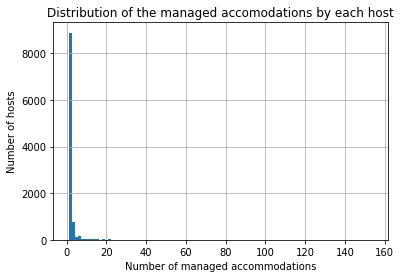

In [110]:
df_host_id.hist(bins = 100);
plt.xlabel('Number of managed accommodations')
plt.ylabel('Number of hosts')
plt.title('Distribution of the managed accomodations by each host');

From the previous pivot table and chart, it can be seen that there are some hosts offering more than 100 rooms/appartments in BCN. This could be companies, since individuals cannot own or manage so a huge amount of accomodations. Nevertheless, from the histogram it can be concluded that most of the hosts manage just one or two appartments. Let's continue with the discussion finding the percentage of accomodations managed by a 

In [111]:
# Calculate percentages and cumsum
df_host_id_perc = df_host_id/df_q3.shape[0]*100
df_host_id_perc['cum'] = df_host_id_perc.host_id.cumsum()
df_host_id_perc.reset_index(drop = True, inplace= True) 
df_host_id_perc

,host_id,cum
0,0.759481,0.759481
1,0.695369,1.454850
2,0.646052,2.100903
3,0.591804,2.692706
4,0.581940,3.274646
...,...,...
10200,0.004932,99.980273
10201,0.004932,99.985205
10202,0.004932,99.990137
10203,0.004932,99.995068


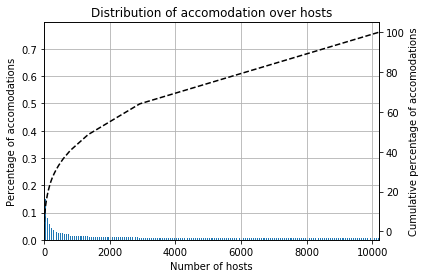

In [117]:
# Plot the results
plt.figure()
ax  = df_host_id_perc['host_id'].plot(kind='bar')
ax2  = df_host_id_perc['cum'].plot(kind = 'line', secondary_y= True,color = 'k', style = '--', grid = True)
ax.set_ylabel('Percentage of accomodations')
ax2.set_ylabel('Cumulative percentage of accomodations')
ax.set_xlabel('Number of hosts')
ax.set_xticks(np.arange(0, 10205, step = 2000))
ax.set_xticklabels(np.arange(0, 10205, step = 2000))
#ax2.set_xticklabels(np.arange(0, 10205, step = 2000))
ax.set_title('Distribution of accomodation over hosts');

From the previous chart, it can be seen how the 30% of the hosts concentrate around 60% of the accomodations. Nevertheless, in general it cannot be seen any concentration of the offer in a few amount of hosts. Thus, BCN citizens (individuals) are profiting from the tourism of the city and it is not the big companies that are benefiting the most. 

In [118]:
# Finally, let's see if this same happens in every neighbourhood or there are differences between them
df_host_id = df_q3.groupby(['neighbourhood_group','host_id'])['host_id'].count().to_frame().reset_index(level=0)
df_host_id = df_host_id.rename(columns = {'host_id':'no_accomodations'}).sort_values(by=['neighbourhood_group', 'no_accomodations'], ascending = False)
df_host_id_neigh = df_q3.groupby(['neighbourhood_group'])['host_id'].count().to_frame()
df_host_id = df_host_id.merge(df_host_id_neigh, on='neighbourhood_group', how='left')
df_host_id['perc'] = df_host_id.no_accomodations/df_host_id.host_id*100
df_host_id['cum'] = df_host_id.groupby('neighbourhood_group')['perc'].cumsum()
df_host_id['counter'] = 1
df_host_id['cum_counter'] = df_host_id.groupby('neighbourhood_group')['counter'].cumsum()
df_host_id_neigh = df_q3.groupby(['neighbourhood_group'])['host_id'].nunique().to_frame()
df_host_id = df_host_id.merge(df_host_id_neigh, on='neighbourhood_group', how='left')
df_host_id['perc_neigh'] = df_host_id.cum_counter/df_host_id.host_id_y*100
df_host_id = df_host_id.drop(['no_accomodations', 'counter', 'host_id_x', 'host_id_y', 'cum_counter', 'perc'], axis = 1)
df_host_id

,neighbourhood_group,cum,perc_neigh
0,Sarrià-Sant Gervasi,7.810499,0.233100
1,Sarrià-Sant Gervasi,12.419974,0.466200
2,Sarrià-Sant Gervasi,14.724712,0.699301
3,Sarrià-Sant Gervasi,16.517286,0.932401
4,Sarrià-Sant Gervasi,18.181818,1.165501
...,...,...,...
11314,Ciutat Vella,99.918384,99.853908
11315,Ciutat Vella,99.938788,99.890431
11316,Ciutat Vella,99.959192,99.926954
11317,Ciutat Vella,99.979596,99.963477


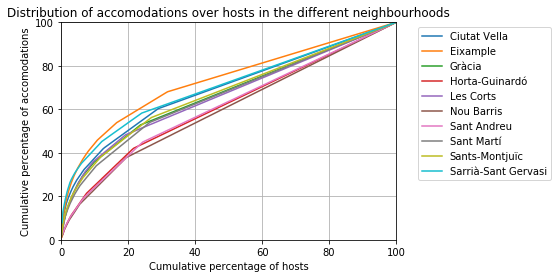

In [119]:
# Plot
df_host_id.pivot(columns='neighbourhood_group', values='cum', index = 'perc_neigh').interpolate(method='linear').plot(grid=True)
plt.ylabel('Cumulative percentage of accomodations')
plt.xlabel('Cumulative percentage of hosts')
plt.xlim((0,100))
plt.ylim((0,100))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.title('Distribution of accomodations over hosts in the different neighbourhoods');

From the previous chart, it can be seen that in general every neighbourhood behaves in the same way. Nevertheless, in Eixample and Sarria-Sant Gervasi a higher concentration of the accomodations in fewer hands is observed, since the slope of the curve is steeper at the beginning of the same. In comparison, in neighbourhoods as Sant Marti, Sant Andreu and Nou Barris, the property is more distributed.

This distribution coincides with the most and less popular neighbourhoods in terms of amount of accomodations available. Companies tend to buy and manage properties in the most popular neighbourhoods, while they avoid less busy neighbourhoods.

### Conclusion

As a conclusion, along this document the situation of the Airbnb accomodations in BCN is studied. As expected, a higher concentration of the offer is located in a few neighbourhoods, while the less popular neighbourhoods concentrate a smaller part of the offer. Also the characteristics of the accomodations are different between both groups. In the first group, more entire appartments are rented compared to private rooms, which increases the mean price of the rents in these areas. In the second group, more rooms are offered compared to entire appartments, reducing the mean prices in these neighbourhoods.

Another difference between the most and less popular neighbourhoods in terms of accomodations offered is the management of the same. In the first group, we find a greater concentration of rents in fewer hosts, compared to the second group in which the property is more distributed throughout the different owners.

Finally, there has been an evolution over the last 2 years, increasing the offer in both, most and less popular neighbourhoods. This increase is greater on average in the neighbourhoods with a higher concentration of appartments than in the less popular neighbourhoods. This could help to an increase in the accomodations' concentration and overpopulation of some neighbourhoods. Simultaneously, prices have also increased by a 40% over the last two years, especially in neighbourhoods like Gracia and Eixample with a price increase above the average. Less popular neighborhoods also have a lower price increase. Thus, there is a gap between both groups that tends to increase in terms of offer, type of accomodations and price.

### Link to Medium

https://medium.com/@cosiodelosarcos/has-tourism-in-barcelona-been-affected-by-the-latest-political-movements-7c25f3932624?source=friends_link&sk=a4cc4267161f0a335336ea966bcd11d1